In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 24
matplotlib.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import numpy as np

import csv
import seaborn as sns

import haversine as hs

import matplotlib.cm as cm
import matplotlib.colors as colors

import folium

In [2]:
compA_df = pd.read_csv('https://storage.googleapis.com/geolocation_data_project_cm/CompA_MinSP_AllData.csv', delimiter=',', encoding='utf-8')
print(compA_df.info())
print(compA_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217788 entries, 0 to 217787
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          217788 non-null  int64  
 1   ORGANISATION_NAME   217788 non-null  object 
 2   AddressID           217788 non-null  int64  
 3   FULL ADDRESS        217788 non-null  object 
 4   lat                 217788 non-null  float64
 5   lng                 217788 non-null  float64
 6   MinDistTo_CompA_SP  217788 non-null  float64
 7   CompA_SP            217788 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 13.3+ MB
None
        Unnamed: 0                 ORGANISATION_NAME  AddressID  \
0                0  THE SUN INSURANCE OFFICE LIMITED     281510   
1                1   COMPTOIR D' ESCOMPTE DE NICOSIE     274852   
2                2                  SIMMONS BROTHERS     274852   
3                3                NEW STAR SHOE SHOP  

In [3]:
compB_df = pd.read_csv('https://storage.googleapis.com/geolocation_data_project_cm/CompB_MinSP_AllData.csv', delimiter=',', encoding='utf-8')
print(compB_df.info())
print(compB_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217788 entries, 0 to 217787
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          217788 non-null  int64  
 1   ORGANISATION_NAME   217788 non-null  object 
 2   AddressID           217788 non-null  int64  
 3   FULL ADDRESS        217788 non-null  object 
 4   lat                 217788 non-null  float64
 5   lng                 217788 non-null  float64
 6   MinDistTo_CompB_SP  217788 non-null  float64
 7   CompB_SP            217788 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 13.3+ MB
None
        Unnamed: 0                 ORGANISATION_NAME  AddressID  \
0                0  THE SUN INSURANCE OFFICE LIMITED     281510   
1                1   COMPTOIR D' ESCOMPTE DE NICOSIE     274852   
2                2                  SIMMONS BROTHERS     274852   
3                3                NEW STAR SHOE SHOP  

In [4]:
model_df = pd.read_csv('https://storage.googleapis.com/geolocation_data_project_cm/distances_Model37.csv', delimiter=',', encoding='utf-8')
print(model_df.info())
print(model_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217788 entries, 0 to 217787
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              217788 non-null  int64  
 1   ORGANISATION_NAME       217788 non-null  object 
 2   REGISTRATION_NO         217788 non-null  int64  
 3   ORGANISATION_TYPE_CODE  217788 non-null  object 
 4   ORGANISATION_TYPE       217788 non-null  object 
 5   ORGANISATION_STATUS     217788 non-null  object 
 6   address_seq_no          217788 non-null  int64  
 7   ADDRESS_L1              214332 non-null  object 
 8   ADDRESS_L3              217788 non-null  object 
 9   FULL ADDRESS            217788 non-null  object 
 10  lat_lng                 217788 non-null  object 
 11  lat                     217788 non-null  float64
 12  lng                     217788 non-null  float64
 13  Valid Seq               217788 non-null  int64  
 14  lat_txt             

In [5]:
#Keep only the common entities in all dataframes
model_df = model_df.drop_duplicates(subset='ORGANISATION_NAME', keep='first')
keep_entities = compA_df['ORGANISATION_NAME']
model_df = pd.merge(model_df, keep_entities, on='ORGANISATION_NAME', how='inner')
model_df

Unnamed: 0                                  ORGANISATION_NAME  \
0                0                   THE SUN INSURANCE OFFICE LIMITED   
1                1  ΚΥΠΡΙΑΚΟΝ ΕΜΠΟΡΙΚΟΝ ΚΑΙ ΒΙΟΜΗΧΑΝΙΚΟΝ ΕΠΙΜΕΛΗΤΗ...   
2                2  ΕΜΠΟΡΙΚΟΝ ΚΑΙ ΒΙΟΜΗΧΑΝΙΚΟΝ ΕΠΙΜΕΛΗΤΗΡΙΟΝ ΛΕΥΚΩ...   
3                3  Ο ΚΥΠΡΙΑΚΟΣ ΣΥΝΔΕΣΜΟΣ ΙΔΙΟΚΤΗΤΩΝ ΑΚΙΝΗΤΩΝ ΛΙΜΙΤΕΔ   
4                4               CYPRUS-AMERICAN BUSINESS ASSOCIATION   
...            ...                                                ...   
217783      217783                           SHL PREMIUM PRODUCTS LTD   
217784      217784                             MYSTEME TRADING CO LTD   
217785      217785                               ESTAD RESTAURANT LTD   
217786      217786                             P2C DIGITAL EUROPE LTD   
217787      217787                          ΣΥΛΒΕΣΤΡΟΥ ΚΑΙ ΠΗΛΑΔΗ ΛΤΔ   

        REGISTRATION_NO ORGANISATION_TYPE_CODE  ORGANISATION_TYPE  \
0                    11                      O  Αλλοδαπή Εταιρεία   
1                    19                      C           Εταιρεία   
2                   502                      C           Εταιρεία   
3                  1293                      C           Εταιρεία   
4                 17284                      B  Εμπορική Επωνυμία   
...                 ...                    ...                ...   
217783           439190                      C           Εταιρεία   
217784           439296                      C           Εταιρεία   
217785           440244                      C           Εταιρεία   
217786           440602                      C           Εταιρεία   
217787           442013                      C           Εταιρεία   

       ORGANISATION_STATUS  address_seq_no                       ADDRESS_L1  \
0             Εγγεγραμμένη          281510       ΠΡΙΓΚΙΠΙΣΣΗΣ ΝΤΕ ΤΥΡΑΣ 12    
1             Εγγεγραμμένη           83196  ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3    
2             Εγγεγραμμένη           83196  ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3    
3             Εγγεγραμμένη           83196  ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3    
4             Εγγεγραμμένη           83196  ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3    
...                    ...             ...                              ...   
217783        Εγγεγραμμένη         1036777           ΑΛΕΞΑΝΔΡΟΥ ΥΨΗΛΑΝΤΗ 3    
217784        Εγγεγραμμένη         1037182                       ΑΝΘΕΩΝ 13    
217785        Εγγεγραμμένη          111964                   ΤΕΡΣΕΦΑΝΟΥ 20    
217786        Εγγεγραμμένη          996418                    ΕΞΕΓΕΡΣΕΩΣ 4    
217787        Εγγεγραμμένη          352550                     ΟΔΥΣΣΕΩΣ 10    

                      ADDRESS_L3  \
0                      ΛΕΥΚΩΣΙΑ    
1                      ΛΕΥΚΩΣΙΑ    
2                      ΛΕΥΚΩΣΙΑ    
3                      ΛΕΥΚΩΣΙΑ    
4                      ΛΕΥΚΩΣΙΑ    
...                          ...   
217783  ΤΕΡΣΕΦΑΝΟΥ 7562 ΛΑΡΝΑΚΑ    
217784        ΚΙΤΙ 7550 ΛΑΡΝΑΚΑ    
217785        ΚΙΤΙ 7550 ΛΑΡΝΑΚΑ    
217786    ΠΕΡΒΟΛΙΑ 7560 ΛΑΡΝΑΚΑ    
217787  ΤΕΡΣΕΦΑΝΟΥ 7562 ΛΑΡΝΑΚΑ    

                                           FULL ADDRESS  ...        lng  \
0                  ΠΡΙΓΚΙΠΙΣΣΗΣ ΝΤΕ ΤΥΡΑΣ 12  ΛΕΥΚΩΣΙΑ   ...  33.360473   
1             ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3  ΛΕΥΚΩΣΙΑ   ...  33.360473   
2             ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3  ΛΕΥΚΩΣΙΑ   ...  33.360473   
3             ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3  ΛΕΥΚΩΣΙΑ   ...  33.360473   
4             ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3  ΛΕΥΚΩΣΙΑ   ...  33.360473   
...                                                 ...  ...        ...   
217783  ΑΛΕΞΑΝΔΡΟΥ ΥΨΗΛΑΝΤΗ 3  ΤΕΡΣΕΦΑΝΟΥ 7562 ΛΑΡΝΑΚΑ   ...  33.546889   
217784                    ΑΝΘΕΩΝ 13  ΚΙΤΙ 7550 ΛΑΡΝΑΚΑ   ...  33.572730   
217785                ΤΕΡΣΕΦΑΝΟΥ 20  ΚΙΤΙ 7550 ΛΑΡΝΑΚΑ   ...  33.572730   
217786             ΕΞΕΓΕΡΣΕΩΣ 4  ΠΕΡΒΟΛΙΑ 7560 ΛΑΡΝΑΚΑ   ...  33.588343   
217787            ΟΔΥΣΣΕΩΣ 10  ΤΕΡΣΕΦΑΝΟΥ 7562 ΛΑΡΝΑΚΑ   ...  33.546889   

        Valid Seq  

In [7]:
statsA_df = pd.read_csv('https://storage.googleapis.com/geolocation_data_project_cm/CompA_InitialStats.csv', delimiter=',', encoding='utf-8')
print("statsA_df")
print(statsA_df)
statsB_df = pd.read_csv('https://storage.googleapis.com/geolocation_data_project_cm/CompB_InitialStats.csv', delimiter=',', encoding='utf-8')
print("statsB_df")
print(statsB_df)
stats_model_df = pd.read_csv('https://storage.googleapis.com/geolocation_data_project_cm/Model37_Stats.csv', delimiter=',', encoding='utf-8')
print("stats_model_df")
print(stats_model_df)

statsA_df
    Unnamed: 0  Service Point  \
0            0              1   
1            1              2   
2            2              3   
3            3              4   
4            4              5   
5            5              6   
6            6              7   
7            7              8   
8            8              9   
9            9             10   
10          10             11   
11          11             12   
12          12             13   
13          13             14   
14          14             15   
15          15             16   
16          16             17   
17          17             18   
18          18             19   
19          19             20   
20          20             21   
21          21             22   
22          22             23   
23          23             24   
24          24             25   
25          25             26   
26          26             27   
27          27             28   
28          28             29   


statsB_df
    Unnamed: 0  Service Point  NoOfCustomers  \
0            0              1           2885   
1            1              2           4242   
2            2              3           3207   
3            3              4           2912   
4            4              5           3047   
5            5              6           6953   
6            6              7           1384   
7            7              8          22259   
8            8              9           3739   
9            9             10           9068   
10          10             11           6266   
11          11             12           1074   
12          12             13           5008   
13          13             14           6025   
14          14             15           4321   
15          15             16          19724   
16          16             17           2860   
17          17             18           6412   
18          18             19           2061   
19          19             20 

stats_model_df
    Unnamed: 0  Service Point  NoOfCustomers  Min Distance  Max Distance  \
0            0              0          40647          0.04          4.16   
1            1              1           9644          0.03          4.15   
2            2              2           6194          0.06          6.23   
3            3              3           2032          0.05         20.16   
4            4              4           5200          0.33          7.89   
5            5              5           1216          0.33         12.15   
6            6              6            584          0.13         12.71   
7            7              7            709          1.96         11.73   
8            8              8            117          2.91         14.38   
9            9              9           1421          0.72          6.36   
10          10             10           4420          0.09          5.78   
11          11             11            788          0.88         11.53 

In [8]:
#Checking population is the same in the different datasets
print("Total customers (CompA)", statsA_df['NoOfCustomers'].sum())
print("Total customers (CompB)", statsB_df['NoOfCustomers'].sum())
print("Total customers (Model)", stats_model_df['NoOfCustomers'].sum())

Total customers (CompA) 217788
Total customers (CompB) 217788
Total customers (Model) 217788


In [9]:
CompA_SPs = pd.DataFrame({'SP': statsA_df['Service Point'],
                         'SP Address_A': statsA_df['Full Address']})

CompB_SPs = pd.DataFrame({'SP': statsB_df['Service Point'],
                         'SP Address_B': statsB_df['Full Address']})

cust_nearest_dfA = pd.DataFrame({'Customer': compA_df.ORGANISATION_NAME,
                                 'Full Address': compA_df['FULL ADDRESS'],
                               'MinDistToSP_A': compA_df.MinDistTo_CompA_SP,
                                'ServicePoint_A': compA_df.CompA_SP})
cust_nearest_dfA = cust_nearest_dfA.merge(CompA_SPs, left_on='ServicePoint_A', right_on='SP', how='left')


cust_nearest_dfB = pd.DataFrame({'Customer': compB_df.ORGANISATION_NAME,
                               'MinDistToSP_B': compB_df.MinDistTo_CompB_SP,
                                'ServicePoint_B': compB_df.CompB_SP})
cust_nearest_dfB = cust_nearest_dfB.merge(CompB_SPs, left_on='ServicePoint_B', right_on='SP', how='left')


# Merge dataframes
cust_nearest_dfA = pd.merge(cust_nearest_dfA, cust_nearest_dfB, on='Customer', how='inner')


#Calculate totals in CompA and CompB for comparison
nearest = cust_nearest_dfA[['MinDistToSP_A', 'MinDistToSP_B']]
nearest = nearest.rename(columns={'MinDistToSP_A': 'Comp A', 'MinDistToSP_B': 'Comp B'})
min_distances = nearest.idxmin(axis=1)
count_closest_customers = min_distances.value_counts()
count_closest_customers

Comp A    125520
Comp B     92268
dtype: int64

In [10]:
cust_nearest_dfA = cust_nearest_dfA.drop(['SP_x','SP_y'], axis=1)
cust_nearest_dfA

Customer  \
0       THE SUN INSURANCE OFFICE LIMITED   
1        COMPTOIR D' ESCOMPTE DE NICOSIE   
2                       SIMMONS BROTHERS   
3                     NEW STAR SHOE SHOP   
4              CHARALAMBOS PIERI AND SON   
...                                  ...   
217783   BEAUTY STUDIO BY THEKLA LIMITED   
217784                      ZI. RA 1 LTD   
217785                 ACLA AUDITORS LTD   
217786         ΣΥΛΒΕΣΤΡΟΥ ΚΑΙ ΠΗΛΑΔΗ ΛΤΔ   
217787                       ILLIDAN LTD   

                                             Full Address  MinDistToSP_A  \
0                    ΠΡΙΓΚΙΠΙΣΣΗΣ ΝΤΕ ΤΥΡΑΣ 12  ΛΕΥΚΩΣΙΑ            0.67   
1                                               ΛΕΥΚΩΣΙΑ            0.57   
2                                               ΛΕΥΚΩΣΙΑ            0.57   
3                                               ΛΕΥΚΩΣΙΑ            0.57   
4                               ARISTIDES ROAD  ΛΕΥΚΩΣΙΑ            0.57   
...                                                   ...            ...   
217783  ΠΑΝΑΓΙΩΤΗ ΑΝΑΓΝΩΣΤΟΠΟΥΛΟΥ 68  ΚΑΤΩ ΠΟΛΕΜΙΔΙΑ 4...           1.01   
217784                        ΓΛΑΔΣΤΩΝΟΣ 1  6023 ΛΑΡΝΑΚΑ            0.50   
217785   ΠΕΝΤΑΔΑΚΤΥΛΟΥ 21  ΑΓΙΟΙ ΤΡΙΜΙΘΙΑΣ 2671 ΛΕΥΚΩΣΙΑ            3.93   
217786              ΟΔΥΣΣΕΩΣ 10  ΤΕΡΣΕΦΑΝΟΥ 7562 ΛΑΡΝΑΚΑ            3.26   
217787                     ΑΡΓΥΡΗ ΓΑΒΑΛΑ 3  3112 ΛΕΜΕΣΟΣ            0.56   

        ServicePoint_A                                       SP Address_A  \
0                    3                   Λεωφ. Μακαρίου 39, Λευκωσία 1065   
1                   17                   Λεωφ. Καντάρας 14, Λευκωσία 1041   
2                   17                   Λεωφ. Καντάρας 14, Λευκωσία 1041   
3                   17                   Λεωφ. Καντάρας 14, Λευκωσία 1041   
4                   17                   Λεωφ. Καντάρας 14, Λευκωσία 1041   
...                ...                                                ...   
217783              50  Θεόδωρου Ποταμιάνου 48, Συνοικισμός Μακαρίου Ι...   
217784              30               Λεωφ. Γρ. Αυξεντίου 42, Λάρνακα 6021   
217785              21       Λεωφ. Γρ. Αυξεντίου 3A, Κοκκινοτριμιθιά 2660   
217786              31                        Αρχ. Μακαρίου 27, Κίτι 7550   
217787              39                          Σαριπόλου 1, Λεμεσός 3036   

        MinDistToSP_B  ServicePoint_B  \
0                0.51              10   
1                0.51              13   
2                0.51              13   
3                0.51              13   
4                0.51              13   
...               ...             ...   
217783           1.82              30   
217784           0.98              25   
217785           4.14               7   
217786           2.53              20   
217787           0.00              27   

                                             SP Address_B  
0                    5, Esperidon Street, Strovolos, 2001  
1                66, Agiou Ilarionos Ave., Kaimakli, 1026  
2                66, Agiou Ilarionos Ave., Kaimakli, 1026  
3                66, Agiou Ilarionos Ave., Kaimakli, 1026  
4                66, Agiou Ilarionos Ave., Kaimakli, 1026  
...                                                   ...  
217783                    15, Paphos Str., Limassol, 3052  
217784      68, Georgiou Griva Digeni Ave., Larnaca, 6046  
217785  31, Georgiou Griva Digeni Str., Kokkinotrimith...  
217786                  2, Dromolaxias Avenue, Kiti, 7550  
217787      108, Fr.Roosevelt Str.&Avanas, Limassol, 3011  

[217788 rows x 8 columns]

In [11]:
#Sample random customers to check their nearest service branches from each company
random_customers = cust_nearest_dfA.sample(n=10, random_state=25)

random_customers

Customer  \
165881   PARAMINA PROPERTIES LIMITED   
74796    Α.ΚΥΡΙΑΚΟΥ ΚΑΙ ΥΙΟΙ ΛΙΜΙΤΕΔ   
181311           ELGAFAR TRADING LTD   
96426   A.F.I.T PRO UAV TECHNOLOGIES   
154847  M. PERRAKIS 7 POINTS LIMITED   
84117       XENION PRIVATE PRESCHOOL   
16455        NEKTRIN TRADING LIMITED   
42328        360° WINNER FACTORY LTD   
114438   MARIOS MICHAEL FARM LIMITED   
67069         AM ROYAL BLINDS CYPRUS   

                                             Full Address  MinDistToSP_A  \
165881  ΣΤΑΣΙΝΟΥ 51  ΑΓΙΑ ΠΑΡΑΣΚΕΥΗ ΣΤΡΟΒΟΛΟΣ 2002 ΛΕΥ...           0.37   
74796   ΚΛΗΜΗΣ 15  ΒΙΟΜΗΧΑΝΙΚΗ ΠΕΡΙΟΧΗ ΑΡΑΔΙΠΠΟΥ 7101 ...           0.86   
181311                     ΓΡΙΒΑ ΔΙΓΕΝΗ 81  6043 ΛΑΡΝΑΚΑ            0.62   
96426             ΑΣΠΡΗΣ 3  ΚΑΤΩ ΛΑΚΑΤΑΜΙΑ 2322 ΛΕΥΚΩΣΙΑ            2.93   
154847            ΑΓΙΟΥ ΚΟΝΩΝΑ 30  ΚΙΣΣΟΝΕΡΓΑ 8574 ΠΑΦΟΣ            4.19   
84117         1ΗΣ ΑΠΡΙΛΙΟΥ 55  ΠΑΡΑΛΙΜΝΙ 5281 ΑΜΜΟΧΩΣΤΟΣ            0.48   
16455             ΙΦΙΓΕΝΕΙΑΣ 17  ΣΤΡΟΒΟΛΟΣ 2007 ΛΕΥΚΩΣΙΑ            0.50   
42328                          ΤΕΠΕΛΕΝΙΟΥ 13  8010 ΠΑΦΟΣ            0.20   
114438                   ΡΩΜΑΝΟΥ 9  ΛΑΤΣΙΑ 2237 ΛΕΥΚΩΣΙΑ            1.84   
67069          ΑΓΙΟΥ ΓΕΩΡΓΙΟΥ 11  ΠΟΛΙΤΙΚΟ 2651 ΛΕΥΚΩΣΙΑ            0.59   

        ServicePoint_A                              SP Address_A  \
165881              59                                   Εύρου 6   
74796               25             Ελευθερίας 1, Ξυλοτύμπου 7510   
181311              32  Κωνστ.Παλαιολόγου & Τήνου , Λάρνακα 6036   
96426               18       Αγίου Στυλιανιού 1, Λακατάμεια 2324   
154847              52           οδός Ακαμαντίδος 26, Πάφος 8016   
84117               24          1ης Απριλίου 160, Παραλίμνι 5280   
16455               59                                   Εύρου 6   
42328               54    E.Παλληκαρίδη&Α.Τσιέλεπου , Πάφος 8010   
114438               1     Ελευθερίου Βενιζέλου 1, Λευκωσία 2235   
67069                3          Λεωφ. Μακαρίου 39, Λευκωσία 1065   

        MinDistToSP_B  ServicePoint_B  \
165881           0.64              11   
74796            1.87              19   
181311           0.31              25   
96426            3.58               6   
154847           3.29              41   
84117            1.68              18   
16455            0.73              10   
42328            0.94              39   
114438           1.98              15   
67069            0.57               8   

                                             SP Address_B  
165881              56, Arch. Makariou Ave. 1075, Nicosia  
74796           11, Michail Karaoli Str., Aradippou, 7104  
181311      68, Georgiou Griva Digeni Ave., Larnaca, 6046  
96426                         3, Aheon Str., Engomi, 2413  
154847            76, Eleftherias Avenue, Chlorakas, 8220  
84117   Corner Protaras & 2-4 Megalou Alexandrou Ave.,...  
16455                5, Esperidon Street, Strovolos, 2001  
42328           26, Tombs of the Kings Ave., Paphos, 8046  
114438        85, Giannou Kranidioti Avenue, Latsia, 2231  
67069         34, Demostheni Severi Avenue, Nicosia, 1080

In [12]:
num_service_points_A = len(statsA_df['Service Point'])
num_service_points_B = len(statsB_df['Service Point'])
num_service_points_model = len(stats_model_df['Service Point'])

counts_df = pd.DataFrame({'Company': ['CompA', 'CompB', 'Model'],
                          'NumServicePoints': [num_service_points_A, num_service_points_B, num_service_points_model]})
counts_df

Company  NumServicePoints
0   CompA                60
1   CompB                42
2   Model                37

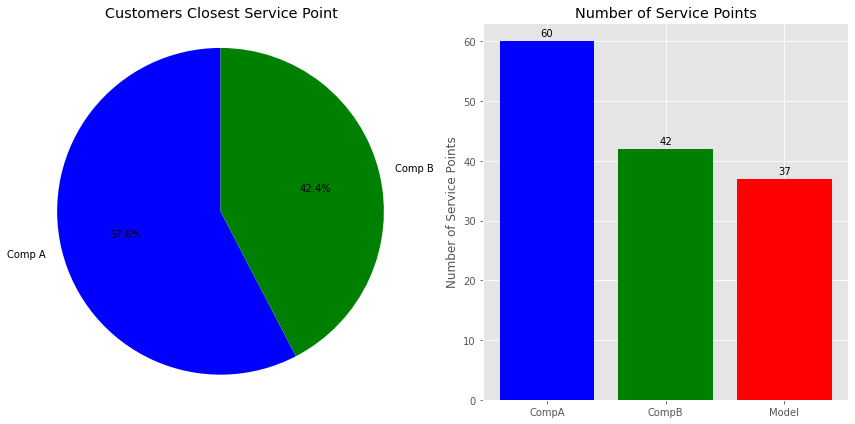

In [13]:
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Pie chart for the company service point closest to each customer
labels = count_closest_customers.index
sizes = count_closest_customers.values

# Bar chart data
labels_bar = counts_df['Company']
values_bar = counts_df['NumServicePoints']

# Plot pie chart
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue','green'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Customers Closest Service Point")

# Plot bar chart
bars = ax2.bar(labels_bar, values_bar, color=['blue', 'green', 'red'])
#ax2.set_xlabel('Company')
ax2.set_ylabel('Number of Service Points')
ax2.set_title('Number of Service Points')

# Add the number of service points on top of the bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

From the above piechart it is obvious that Company A is closest to 55% of the sample customer population.
From the bar plot, we can see that Company A has more Service Points than Company B. For the model we have chosen as per the elbow plot to propose a smaller conservative number of service points -37- to service the sample polulation.

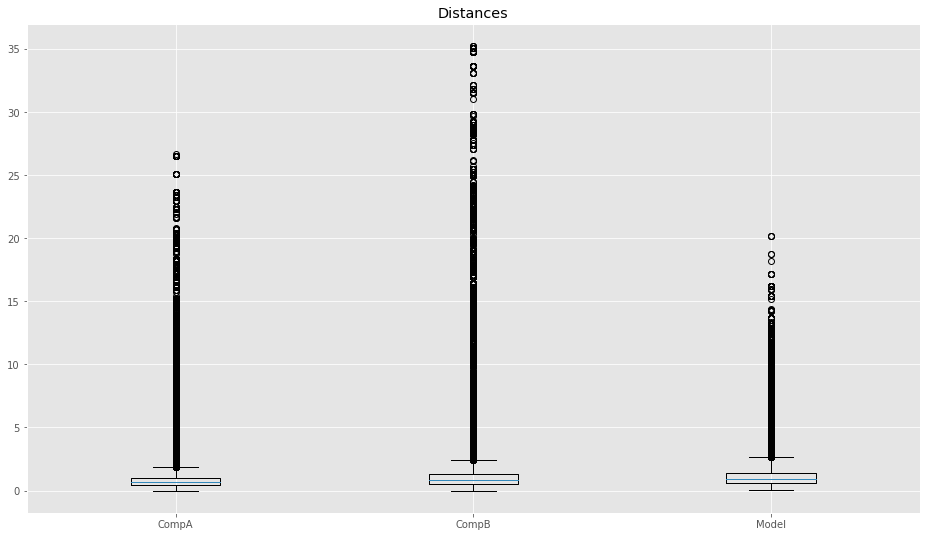

In [14]:
plt.boxplot([compA_df['MinDistTo_CompA_SP'], compB_df['MinDistTo_CompB_SP'], model_df['Distance']], labels = ['CompA', 'CompB', 'Model'])
plt.title('Distances')
plt.show()

Above boxplot compares the distribution of distances to the nearest service point for CompA, CompB and Model for the same set of customers. 
The results suggest that most customers are serviced from nearby service points in all 3 cases. 
It is noticeable that in the model case, we have noticeably less outliers, and all customers are being serviced from service points placed under 20km distance. For CompA and Comp B the max distance to a service point is approximately 27km and 35km respectively. 

In [15]:
compA_95perc = compA_df['MinDistTo_CompA_SP'].quantile(0.95)
compA_5perc = compA_df['MinDistTo_CompA_SP'].quantile(0.05)
print(compA_5perc)
print(compA_95perc)
compB_95perc = compB_df['MinDistTo_CompB_SP'].quantile(0.95)
compB_5perc = compB_df['MinDistTo_CompB_SP'].quantile(0.05)
print(compB_5perc)
print(compB_95perc)
model_95perc = model_df['Distance'].quantile(0.95)
model_5perc = model_df['Distance'].quantile(0.05)
print(model_5perc)
print(model_95perc)

0.14
7.2
0.07
6.72
0.22
3.23


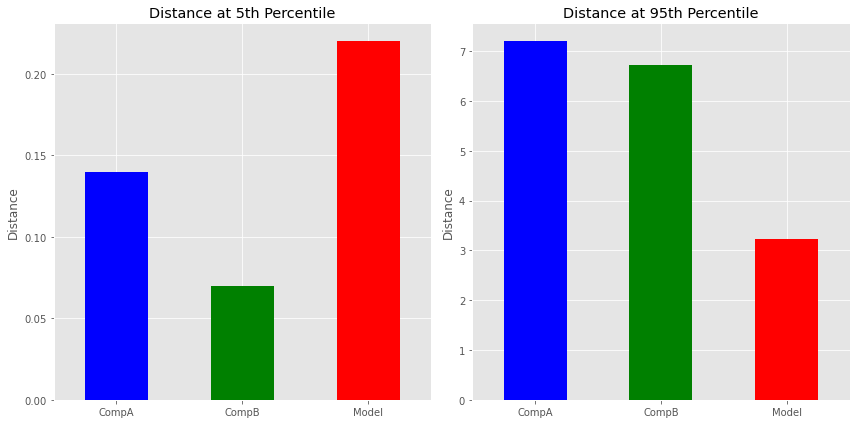

In [16]:
percentiles_df = pd.DataFrame({'Instance': ['CompA', 'CompB', 'Model'],
                        '95th Percentile': [compA_95perc, compB_95perc, model_95perc],
                       '5th Percentile': [compA_5perc, compB_5perc, model_5perc]})

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar plot
percentiles_df.plot(x='Instance', y='5th Percentile', kind='bar', legend=False, color=['blue','green','red'], ax=axes[0])
axes[0].set_ylabel('Distance')
axes[0].set_title('Distance at 5th Percentile')
axes[0].set_xticklabels(percentiles_df['Instance'], rotation=0)
axes[0].set_xlabel('')

percentiles_df.plot(x='Instance', y='95th Percentile', kind='bar', legend=False, color=['blue','green','red'], ax=axes[1])
axes[1].set_ylabel('Distance')
axes[1].set_title('Distance at 95th Percentile')
axes[1].set_xticklabels(percentiles_df['Instance'], rotation=0)
axes[1].set_xlabel('')


plt.tight_layout()
plt.show()

The difference is more obvious when we look at the 5th and 95th percentile distance values.
The 5th percentile is the minimum distance to be travelled to the nearest service point by the nearest 5% of the customers. As shown above the 5th percentile distance is lowest for CompB with 0.07km to be travelled, meaning that 5% of its customers travel below 0.07km to reach their nearest service point. For CompA the value is 0.14km and for the model is 0.15km. 
The 95th percentile, is the measure of the distance that needs to be travelled to the nearest service point by 95% of the customers. In this case the difference is significant. In CompA and CompB the minimum distance to be travelled by 95% of customers is around 7km. In the case of the model though, this distance is halved, to around 3,2km. Therefore 95% of the company's customers are only 3,2km away from their nearest service point, thus suggesting better service point placement since the population is the same for all 3 different instances. 

In [21]:
def min_dist_grp(distance):
    if distance<=1:
        DistanceGroup = "1. <1km"
    elif distance>1 and distance<=5:
        DistanceGroup = "2. 1 - 5km"
    elif distance>5 and distance<=10:
        DistanceGroup = "3. 5 - 10km"
    elif distance>10 and distance<=20:
        DistanceGroup = "4. 10 - 20km"
    elif distance>20:
        DistanceGroup = "5. >20km"
    return DistanceGroup

compA_df['DistanceGroup'] = compA_df['MinDistTo_CompA_SP'].apply(min_dist_grp)
compB_df['DistanceGroup'] = compB_df['MinDistTo_CompB_SP'].apply(min_dist_grp)
model_df['DistanceGroup'] = model_df['Distance'].apply(min_dist_grp)

In [18]:
model_df

Unnamed: 0                                  ORGANISATION_NAME  \
0                0                   THE SUN INSURANCE OFFICE LIMITED   
1                1  ΚΥΠΡΙΑΚΟΝ ΕΜΠΟΡΙΚΟΝ ΚΑΙ ΒΙΟΜΗΧΑΝΙΚΟΝ ΕΠΙΜΕΛΗΤΗ...   
2                2  ΕΜΠΟΡΙΚΟΝ ΚΑΙ ΒΙΟΜΗΧΑΝΙΚΟΝ ΕΠΙΜΕΛΗΤΗΡΙΟΝ ΛΕΥΚΩ...   
3                3  Ο ΚΥΠΡΙΑΚΟΣ ΣΥΝΔΕΣΜΟΣ ΙΔΙΟΚΤΗΤΩΝ ΑΚΙΝΗΤΩΝ ΛΙΜΙΤΕΔ   
4                4               CYPRUS-AMERICAN BUSINESS ASSOCIATION   
...            ...                                                ...   
217783      217783                           SHL PREMIUM PRODUCTS LTD   
217784      217784                             MYSTEME TRADING CO LTD   
217785      217785                               ESTAD RESTAURANT LTD   
217786      217786                             P2C DIGITAL EUROPE LTD   
217787      217787                          ΣΥΛΒΕΣΤΡΟΥ ΚΑΙ ΠΗΛΑΔΗ ΛΤΔ   

        REGISTRATION_NO ORGANISATION_TYPE_CODE  ORGANISATION_TYPE  \
0                    11                      O  Αλλοδαπή Εταιρεία   
1                    19                      C           Εταιρεία   
2                   502                      C           Εταιρεία   
3                  1293                      C           Εταιρεία   
4                 17284                      B  Εμπορική Επωνυμία   
...                 ...                    ...                ...   
217783           439190                      C           Εταιρεία   
217784           439296                      C           Εταιρεία   
217785           440244                      C           Εταιρεία   
217786           440602                      C           Εταιρεία   
217787           442013                      C           Εταιρεία   

       ORGANISATION_STATUS  address_seq_no                       ADDRESS_L1  \
0             Εγγεγραμμένη          281510       ΠΡΙΓΚΙΠΙΣΣΗΣ ΝΤΕ ΤΥΡΑΣ 12    
1             Εγγεγραμμένη           83196  ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3    
2             Εγγεγραμμένη           83196  ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3    
3             Εγγεγραμμένη           83196  ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3    
4             Εγγεγραμμένη           83196  ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3    
...                    ...             ...                              ...   
217783        Εγγεγραμμένη         1036777           ΑΛΕΞΑΝΔΡΟΥ ΥΨΗΛΑΝΤΗ 3    
217784        Εγγεγραμμένη         1037182                       ΑΝΘΕΩΝ 13    
217785        Εγγεγραμμένη          111964                   ΤΕΡΣΕΦΑΝΟΥ 20    
217786        Εγγεγραμμένη          996418                    ΕΞΕΓΕΡΣΕΩΣ 4    
217787        Εγγεγραμμένη          352550                     ΟΔΥΣΣΕΩΣ 10    

                      ADDRESS_L3  \
0                      ΛΕΥΚΩΣΙΑ    
1                      ΛΕΥΚΩΣΙΑ    
2                      ΛΕΥΚΩΣΙΑ    
3                      ΛΕΥΚΩΣΙΑ    
4                      ΛΕΥΚΩΣΙΑ    
...                          ...   
217783  ΤΕΡΣΕΦΑΝΟΥ 7562 ΛΑΡΝΑΚΑ    
217784        ΚΙΤΙ 7550 ΛΑΡΝΑΚΑ    
217785        ΚΙΤΙ 7550 ΛΑΡΝΑΚΑ    
217786    ΠΕΡΒΟΛΙΑ 7560 ΛΑΡΝΑΚΑ    
217787  ΤΕΡΣΕΦΑΝΟΥ 7562 ΛΑΡΝΑΚΑ    

                                           FULL ADDRESS  ... Valid Seq  \
0                  ΠΡΙΓΚΙΠΙΣΣΗΣ ΝΤΕ ΤΥΡΑΣ 12  ΛΕΥΚΩΣΙΑ   ...    281510   
1             ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3  ΛΕΥΚΩΣΙΑ   ...     83196   
2             ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3  ΛΕΥΚΩΣΙΑ   ...     83196   
3             ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3  ΛΕΥΚΩΣΙΑ   ...     83196   
4             ΓΡΙΒΑ ΔΙΓΕΝΗ 38 & ΔΕΛΗΓΙΩΡΓΗ 3  ΛΕΥΚΩΣΙΑ   ...     83196   
...                                                 ...  ...       ...   
217783  ΑΛΕΞΑΝΔΡΟΥ ΥΨΗΛΑΝΤΗ 3  ΤΕΡΣΕΦΑΝΟΥ 7562 ΛΑΡΝΑΚΑ   ...   1036777   
217784                    ΑΝΘΕΩΝ 13  ΚΙΤΙ 7550 ΛΑΡΝΑΚΑ   ...   1037182   
217785                ΤΕΡΣΕΦΑΝΟΥ 20  ΚΙΤΙ 7550 ΛΑΡΝΑΚΑ   ...    111964   
217786             ΕΞΕΓΕΡΣΕΩΣ 4  ΠΕΡΒΟΛΙΑ 7560 ΛΑΡΝΑΚΑ   ...    996418   
217787            ΟΔΥΣΣΕΩΣ 10  ΤΕΡΣΕΦΑΝΟΥ 7562 ΛΑΡΝΑΚΑ   ...    352550   

          lat_txt    lng_txt  S

In [22]:
# Count total per BranchSize in statsA_df
statsA_Distance_counts = compA_df.groupby('DistanceGroup')['ORGANISATION_NAME'].count()
print(statsA_Distance_counts)
# Count total per BranchSize in statsB_df
statsB_Distance_counts = compB_df.groupby('DistanceGroup')['ORGANISATION_NAME'].count()
print(statsB_Distance_counts)
# Count total per BranchSize in stats_model_df
stats_model_Distance_counts = model_df.groupby('DistanceGroup')['ORGANISATION_NAME'].count()
print(stats_model_Distance_counts)

# Create an empty DataFrame
branch_distance_df = pd.DataFrame()
branch_distance_df['DistanceGroup'] = ['1. <1km', '2. 1 - 5km', '3. 5 - 10km', '4. 10 - 20km', '5. >20km']

# Merge dataframes
branch_distance_df = pd.merge(branch_distance_df, statsA_Distance_counts, on='DistanceGroup', how='left')
branch_distance_df = pd.merge(branch_distance_df, statsB_Distance_counts, on='DistanceGroup', how='left')
branch_distance_df = pd.merge(branch_distance_df, stats_model_Distance_counts, on='DistanceGroup', how='left')

# Rename columns
branch_distance_df.rename(columns={'ORGANISATION_NAME_x': 'CompA', 'ORGANISATION_NAME_y': 'CompB', 'ORGANISATION_NAME': 'Model'}, inplace=True)

# Fill NaN values with 0
branch_distance_df.fillna(0, inplace=True)

branch_distance_df_styled = branch_distance_df.style.format({"CompA": "{:,.0f}", "CompB": "{:,.0f}", "Model": "{:,.0f}"})

branch_distance_df_styled

DistanceGroup
1. <1km         163600
2. 1 - 5km       38705
3. 5 - 10km      11593
4. 10 - 20km      3531
5. >20km           359
Name: ORGANISATION_NAME, dtype: int64
DistanceGroup
1. <1km         132461
2. 1 - 5km       68108
3. 5 - 10km      10992
4. 10 - 20km      4824
5. >20km          1403
Name: ORGANISATION_NAME, dtype: int64
DistanceGroup
1. <1km         132432
2. 1 - 5km       80455
3. 5 - 10km       4267
4. 10 - 20km       631
5. >20km             3
Name: ORGANISATION_NAME, dtype: int64


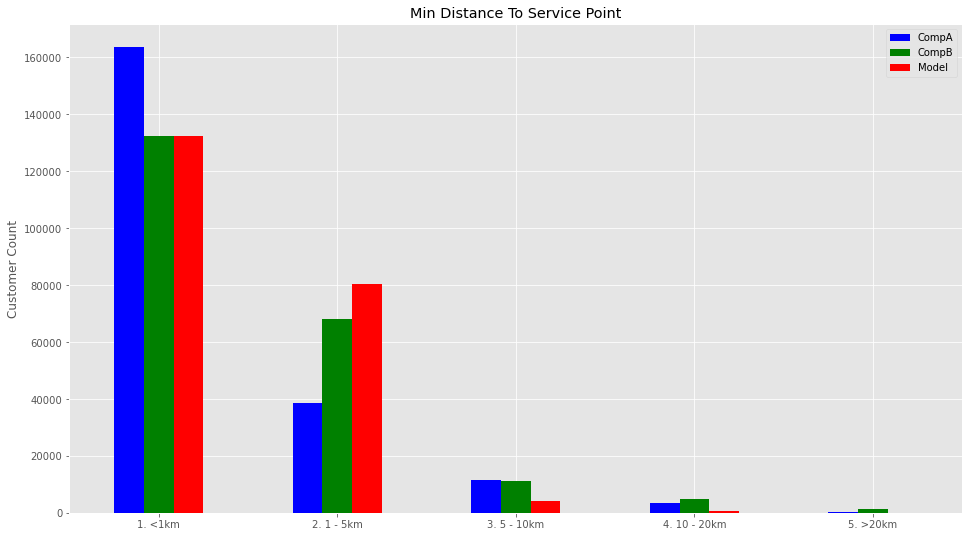

In [35]:
#Plot the distance distribution
branch_distance_df.plot(x=('DistanceGroup'), kind='bar', color=['b', 'g', 'r'])
plt.title('Min Distance To Service Point')
plt.xlabel('')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.show()

From the above plot of the minimum distance to a service point of CompA, CompB and the model's proposed service points, we notice that:
Company A's service points are placed to serve the vast majority of it's customers under <1km (160k). The number of customers being serviced from service points in the 1-5km range are only 25% of the customers serviced in <1km (40k), and the number continues to decrease further for the 5-10, 10-20 and >20 km range.
Company B's service points follow a more balanced pattern, more similar to the model's pattern.
The proposed model's service points, suggest service point placement such that the number of customers being serviced by service points in the <1km and 1-5km range do not present great variability as CompA’s service point placement. It is also noticeable that there are no customers in the >20km range.

In [24]:
CompA_Totals = statsA_df['NoOfCustomers'].aggregate([np.min,np.max,np.mean,np.median])
CompA_Totals

amin        327.0
amax      23857.0
mean       3629.8
median     2607.0
Name: NoOfCustomers, dtype: float64

In [25]:
CompB_Totals = statsB_df['NoOfCustomers'].aggregate([np.min,np.max,np.mean,np.median])
CompB_Totals

amin        581.000000
amax      22259.000000
mean       5185.428571
median     4069.500000
Name: NoOfCustomers, dtype: float64

In [26]:
Model_Totals = stats_model_df['NoOfCustomers'].aggregate([np.min,np.max,np.mean,np.median])
Model_Totals

amin        117.000000
amax      40647.000000
mean       5886.162162
median     2349.000000
Name: NoOfCustomers, dtype: float64

From the above statistics with regards to the number of customers in every service point, Company A has better location of service points as suggested by the mean and the median number of customers per service point.
The model clearly exhibits greater variance in the min and max number of customers per service point. But the median measure suggests is quite lower than the competitor companies, as through the suggested service point placement, the customers per service point count is more balanced.

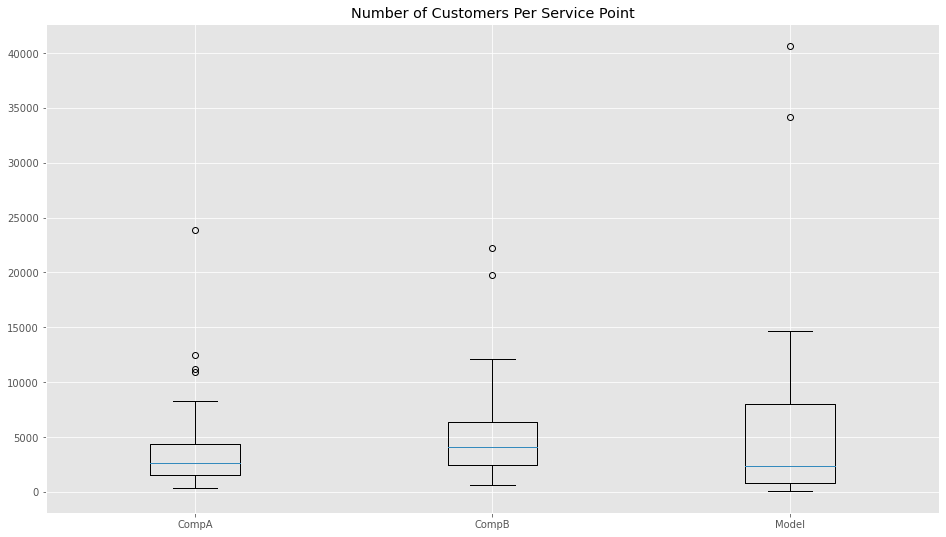

In [27]:
plt.boxplot([statsA_df['NoOfCustomers'], statsB_df['NoOfCustomers'], stats_model_df['NoOfCustomers']], labels = ['CompA', 'CompB', 'Model'])
plt.title('Number of Customers Per Service Point')
plt.show()

The above boxplot displayes the number of customers distribution of values per service point, for CompA, CompB and the proposed model. From the plot we notice the following: 
 - The distance between the first quartile and the minimum of the model's boxplot, suggests that due to the small number of customers, these service points could be dismissed if the number of customers is under a given threshold, or simply be self-service points, for example ATMs
 - The median number of customers is lower for the model than CompA and CompB
 - The maximum number of customers, and the outliers suggest that there is great variability in the customers to be serviced by the top quartile and the outliers for the proposed model. 
Based on these results we will proceed to introduce a new variable - service point size - to group service points by the number of customers they will be serving as below:
- Under 500 Customers - ATM
- 500 - 2000 Customers - Small
- 2000 - 10000 Customers - Medium
- 10000 - 20000 Customers - Large
- Over 20000 Customers - ExtraLarge

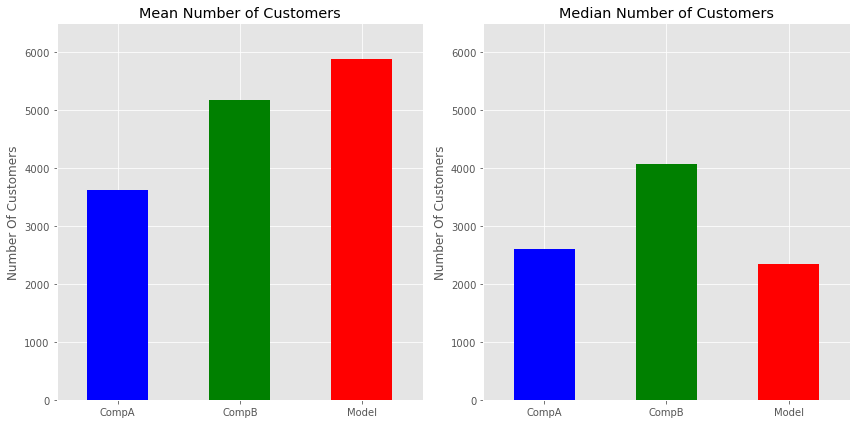

In [34]:
mean_df = pd.DataFrame({'Instance': ['CompA', 'CompB', 'Model'],
                        'Mean': [CompA_Totals['mean'], CompB_Totals['mean'], Model_Totals['mean']],
                       'Median': [CompA_Totals['median'], CompB_Totals['median'], Model_Totals['median']]})

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar plot
mean_df.plot(x='Instance', y='Mean', kind='bar', legend=False, color=['blue','green','red'], ax=axes[0])
axes[0].set_ylabel('Number Of Customers')
axes[0].set_title('Mean Number of Customers')
axes[0].set_xticklabels(mean_df['Instance'], rotation=0)
axes[0].set_xlabel('')

mean_df.plot(x='Instance', y='Median', kind='bar', legend=False, color=['blue','green','red'], ax=axes[1])
axes[1].set_ylabel('Number Of Customers')
axes[1].set_title('Median Number of Customers')
axes[1].set_xticklabels(mean_df['Instance'], rotation=0)
axes[1].set_xlabel('')

axes[0].set_ylim(0, 6500)
axes[1].set_ylim(0, 6500)

plt.tight_layout()
plt.show()


In [29]:
def branch_size(row):
    if row['NoOfCustomers']<=500:
        BranchSize = "ATM"
    if row['NoOfCustomers']>500 and row['NoOfCustomers']<=2000:
        BranchSize = "Small"
    if row['NoOfCustomers']>2000 and row['NoOfCustomers']<=10000:
        BranchSize = "Medium"
    if row['NoOfCustomers']>10000 and row['NoOfCustomers']<=20000:
        BranchSize = "Large"
    if row['NoOfCustomers']>20000:
        BranchSize = "ExtraLarge"
    return BranchSize
        
statsA_df['BranchSize'] = statsA_df.apply(lambda row: branch_size(row), axis=1)
statsB_df['BranchSize'] = statsB_df.apply(lambda row: branch_size(row), axis=1)
stats_model_df['BranchSize'] = stats_model_df.apply(lambda row: branch_size(row), axis=1)


In [31]:
# Count total per BranchSize in statsA_df
statsA_BranchSize_counts = statsA_df.groupby('BranchSize')['Service Point'].count()

# Count total per BranchSize in statsB_df
statsB_BranchSize_counts = statsB_df.groupby('BranchSize')['Service Point'].count()

# Count total per BranchSize in stats_model_df
stats_model_BranchSize_counts = stats_model_df.groupby('BranchSize')['Service Point'].count()

# Create an empty DataFrame
branch_size_df = pd.DataFrame()
branch_size_df['BranchSize'] = ['ATM', 'Small', 'Medium', 'Large', 'ExtraLarge']
branch_size_df['CustomersServiced'] = ['<500', '500-2.000', '2.000-10.000', '10.000-20.000', '>20.000']

# Merge dataframes
branch_size_df = pd.merge(branch_size_df, statsA_BranchSize_counts, on='BranchSize', how='left')
branch_size_df = pd.merge(branch_size_df, statsB_BranchSize_counts, on='BranchSize', how='left')
branch_size_df = pd.merge(branch_size_df, stats_model_BranchSize_counts, on='BranchSize', how='left')

# Rename columns
branch_size_df.rename(columns={'Service Point_x': 'CompA', 'Service Point_y': 'CompB', 'Service Point': 'Model'}, inplace=True)
branch_size_df.rename(columns={'BranchSize': 'ServicePointSize'}, inplace=True)
# Fill NaN values with 0
branch_size_df['CompA'] = branch_size_df['CompA'].fillna(0).astype(int)
branch_size_df['CompB'] = branch_size_df['CompB'].fillna(0).astype(int)
branch_size_df['Model'] = branch_size_df['Model'].fillna(0).astype(int)

branch_size_df


ServicePointSize CustomersServiced  CompA  CompB  Model
0              ATM              <500      2      0      4
1            Small         500-2.000     22      8     12
2           Medium      2.000-10.000     32     30     16
3            Large     10.000-20.000      3      3      3
4       ExtraLarge           >20.000      1      1      2

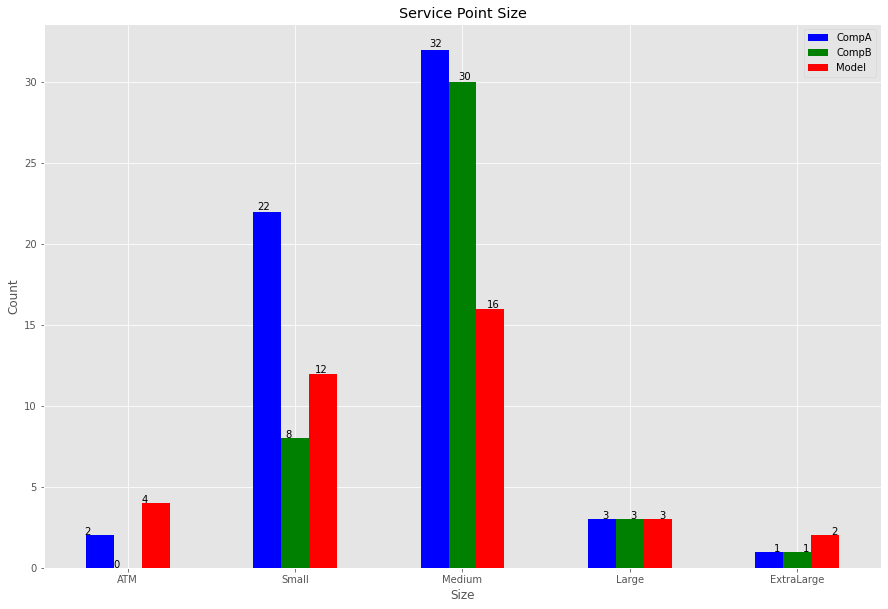

In [32]:
#Plot the branch size distribution
ax = branch_size_df.plot(x=('ServicePointSize'), kind='bar', figsize=(15,10), color=['b', 'g', 'r'])
plt.title('Service Point Size')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.005))

plt.show()


From the above distribution plot, we notice that Company A and Company B have mostly small and medium sized branches in terms of the customers being serviced. The model proposes a wider and more balanced range of branch sizes. This is mostly noticeable in the "Medium" category of branches, where Company A and Company B have 32 and 30 branches respectively, whereas the model proposes only 16 medium sized branches.

The size of the branch can also be interpreted in terms of the staff needed to service the branch's customers. The reduced number of branches, as well as the calculated staff needs, translate to reduced operating costs, while maintaining high quality of service to the company's customers. 

In [ ]:
#pip install folium

In [37]:
import folium

map = folium.Map(location=[35.142155, 33.179913], zoom_start=9)

# Add markers for the pins from CompA dataframe
for index, row in statsA_df.iterrows():
    radius = 0
    if row['BranchSize'] == 'ATM':
        radius = 3
    elif row['BranchSize'] == 'Small':
        radius = 6
    elif row['BranchSize'] == 'Medium':
        radius = 9
    elif row['BranchSize'] == 'Large':
        radius = 12
    elif row['BranchSize'] == 'ExtraLarge':
        radius = 15
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=[row['Service Point'],
               row['BranchSize']]).add_to(map)

# Add markers for the pins from CompB dataframe
for index, row in statsB_df.iterrows():
    radius = 0
    if row['BranchSize'] == 'ATM':
        radius = 3
    elif row['BranchSize'] == 'Small':
        radius = 6
    elif row['BranchSize'] == 'Medium':
        radius = 9
    elif row['BranchSize'] == 'Large':
        radius = 12
    elif row['BranchSize'] == 'ExtraLarge':
        radius = 15
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        popup=[row['Service Point'],
               row['BranchSize']]).add_to(map)

# Add markers for the pins from Model data
for index, row in stats_model_df.iterrows():
    radius = 0
    if row['BranchSize'] == 'ATM':
        radius = 3
    elif row['BranchSize'] == 'Small':
        radius = 6
    elif row['BranchSize'] == 'Medium':
        radius = 9
    elif row['BranchSize'] == 'Large':
        radius = 12
    elif row['BranchSize'] == 'ExtraLarge':
        radius = 15
    folium.CircleMarker(
        location=[row['SP_lat'], row['SP_lon']],
        radius=radius,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=[row['Service Point'],
               row['BranchSize']]).add_to(map)

# Create legend
legend_html =   '''
                <div style="position: fixed; 
                            top: 20px; left: 50px; width: 220px; height: 90px; 
                            border: 2px solid grey; background-color: #cccccc;
                            z-index:9999; font-size:14px;
                            ">&nbsp; <b>Legend <br>
                              &nbsp; <span style="color:blue;">Blue: CompA Service Points</span><br>
                              &nbsp; <span style="color:green;">Green: CompB Service Points</span> <br>
                              &nbsp; <span style="color:red;">Red: Model Service Points</span><br></b>
                              </div>
                              '''
map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
map